# Modeling Regression Problems

Made for the Data Science Workshop 2018 (African Institute for Mathematical Sciences)

Extended from (https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/)

## Imports first

In [294]:
import numpy as np
np.random.seed(1337) # for reproducibility
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import set_random_seed
import matplotlib.pyplot as plt

## Load the dataset

In [295]:
# load dataset
dataframe = pandas.read_csv("BostonHousePrice.txt", header=None,delim_whitespace=True)
dataset = dataframe.values

In [296]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [297]:
dataset

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          3.96900000e+02,   4.98000000e+00,   2.40000000e+01],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          3.96900000e+02,   9.14000000e+00,   2.16000000e+01],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          3.92830000e+02,   4.03000000e+00,   3.47000000e+01],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          3.96900000e+02,   5.64000000e+00,   2.39000000e+01],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          3.93450000e+02,   6.48000000e+00,   2.20000000e+01],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          3.96900000e+02,   7.88000000e+00,   1.19000000e+01]])

## Split the data into features and the class values

In [298]:
X = dataset[:,0:13]
Y = dataset[:,13]

## Split the data into training and test data

In [301]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)

In [302]:
X_train[0]

array([  4.66600000e-02,   8.00000000e+01,   1.52000000e+00,
         0.00000000e+00,   4.04000000e-01,   7.10700000e+00,
         3.66000000e+01,   7.30900000e+00,   2.00000000e+00,
         3.29000000e+02,   1.26000000e+01,   3.54310000e+02,
         8.61000000e+00])

## Exercise 1

First carry on with this notebook and then once you have trained the two neural networks below then come back to this exercise. Have a look at the data and ask yourself if there is a problem with training the neural nets with the data as it stands. Pay attention to the first three columns. Does the data seem to be on the same scale? Use scikit learn and try and overcome this issue. Then run the neural networks again. Is there a difference in performance?

X_train = ...

X_test = ...

### Print out the first training and test example

In [315]:
X_train[0]

array([-0.42757799,  3.07327739, -1.41603095, -0.27565892, -1.31624691,
        1.18636415, -1.13503207,  1.72081643, -0.86873155, -0.48041639,
       -2.61016722,  0.00955917, -0.57605166])

In [316]:
X_test[0]

array([-0.42356475,  3.07327739, -0.92106358, -0.27565892, -1.25636346,
        1.24570812, -1.45029819,  0.66157608, -0.63628184, -0.98320249,
        0.36931035,  0.46437558, -1.29008508])

## Create a neural network model

In [308]:
# define the model
def baseline():
    # create model
    model = Sequential()
    # add one fully connected layer
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    # add another fully connected layer
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=[metrics.mse])
    
    return model

Note that we are making use of the MSE in terms of determing the loss. 

<img src="mse.png">

## Add some parameters

In [309]:
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline, epochs=20, batch_size=5, verbose=1)

## Determine the number of trainable parameters

In [310]:
baseline().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_168 (Dense)            (None, 13)                182       
_________________________________________________________________
dense_169 (Dense)            (None, 1)                 14        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


## Begin training

In [311]:
history = estimator.fit(X_train, Y_train)

Epoch 1/20
354/354 [==============================] - 0s - loss: 577.3669 - mean_squared_error: 577.3669      
Epoch 2/20
354/354 [==============================] - 0s - loss: 553.3995 - mean_squared_error: 553.3995     

## Predict on the test data

In [317]:
prediction = estimator.predict(X_test)

150/152 [============================>.] - ETA: 0s

## Compute the mean squared error

In [318]:
mean_squared_error(Y_test, prediction)

40.175474020486156

## Plot the error over the epochs

In [313]:
def plot_hist(h, xsize=6, ysize=10):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True)
    
    # summarize history for MAE
    plt.subplot(211)
    plt.plot(h['mean_squared_error'])
    plt.title('Training Mean Squared Error')
    plt.ylabel('Mean Squared Error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    # Plot it all in IPython (non-interactive)
    plt.draw()
    plt.show()

    return

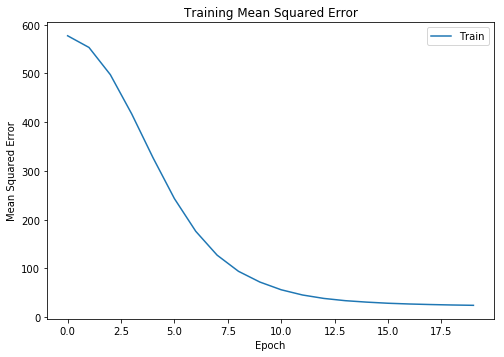

In [314]:
plot_hist(history.history, xsize=8, ysize=12)

## Create a deeper model with more layers

In [209]:
# define the model
def deeper_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(20, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [214]:
estimator = KerasRegressor(build_fn=deeper_model, epochs=20, batch_size=5, verbose=1)

In [215]:
deeper_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 13)                182       
_________________________________________________________________
dense_139 (Dense)            (None, 20)                280       
_________________________________________________________________
dense_140 (Dense)            (None, 1)                 21        
Total params: 483
Trainable params: 483
Non-trainable params: 0
_________________________________________________________________


In [216]:
loss = estimator.fit(X_train, Y_train)

Epoch 1/20
354/354 [==============================] - 0s - loss: 579.4200      
Epoch 2/20
354/354 [==============================] - 0s - loss: 537.4752     
Epoch 3/20
354/354 [==============================] - 0s - loss: 383.1184      

In [217]:
prediction = estimator.predict(X_test)
mean_squared_error(Y_test, prediction)

115/152 [=====================>........] - ETA: 0s

31.62509786855497

## Exercise 2

Is there a difference in performance?

Remember to complete the first exercise at the start of this notebook

Exercise: add more layers, change the number of units in the layers and examine the effects.

You have created two neural networks made up of dense (fully connected layers) in Keras. The documentation (and additional information) is available here: https://keras.io/layers/core/#dense You can customise the choice of parameters for the fully connected layers. Try look at the choices and play around with the parameters (for example: play around with the activation functions within the fully connected layers and see the effect). You can find the different activation functions here: https://keras.io/activations/ as well as more interesting ones here: https://keras.io/layers/advanced-activations/. Ask yourself why are you using the ReLU activation function?

## Exercise 3

Note read in the forest fire dataset "forest.csv".

This is another regression problem. Here the last column in the dataset represents the target class and all the other columns are input features.

Your task is to train a neural network to predict on the target class.

You might have a few challenges in reading in the data. Take a look at the data and make changes to the read_csv function. Pay attention to the number of input features and make changes to the neural network too (hint: input_dim).